## Transfer Learning  VGG16 using Keras

#Plant Disease Prediction

In [33]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/vishalb/Desktop/ML project/Dataset/train'
valid_path = 'C:/Users/vishalb/Desktop/ML project/Dataset/valid'


In [4]:
inception = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('C:/Users/vishalb/Desktop/ML project/Dataset/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('C:/Users/vishalb/Desktop/ML project/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18341 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('C:/Users/vishalb/Desktop/ML project/Dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 574 steps, validate for 144 steps
Epoch 1/10
574/574 [==============================] - 573s 998ms/step - loss: 0.7196 - accuracy: 0.7614 - val_loss: 0.4157 - val_accuracy: 0.8617
Epoch 2/10
574/574 [==============================] - 600s 1s/step - loss: 0.4217 - accuracy: 0.8570 - val_loss: 0.4811 - val_accuracy: 0.8401
Epoch 3/10
574/574 [==============================] - 572s 997ms/step - loss: 0.3165 - accuracy: 0.8917 - val_loss: 0.4216 - val_accuracy: 0.8622
Epoch 4/10
574/574 [==============================] - 382s 666ms/step - loss: 0.3043 - accuracy: 0.8991 - val_loss: 0.3393 - val_accuracy: 0.8920
Epoch 5/10
574/574 [==============================] - 218s 380ms/step - loss: 0.2583 - accuracy: 0.9141 - val_loss: 0.4529 - val_accuracy: 0.8595
Epoch 6/10
574/574 [==============================] - 230s 400ms/step - loss: 0.2398 - accuracy: 0.9176

In [16]:
import matplotlib.pyplot as plt

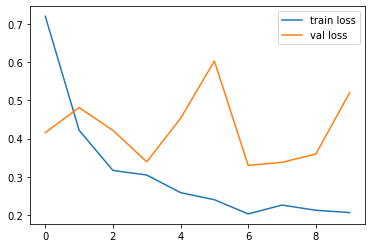

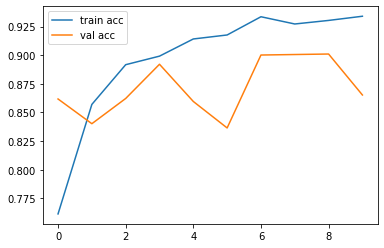

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [15]:
y_pred = model.predict(test_set)

In [16]:
y_pred

array([[0.12317778, 0.2340458 , 0.13562636, ..., 0.017303  , 0.20939106,
        0.09385853],
       [0.12573515, 0.16888711, 0.15863547, ..., 0.01794803, 0.27330962,
        0.09481549],
       [0.09375463, 0.2702813 , 0.12956896, ..., 0.01579647, 0.2525236 ,
        0.09425848],
       ...,
       [0.07808338, 0.18931448, 0.16269287, ..., 0.0126479 , 0.29852647,
        0.08505348],
       [0.08798647, 0.2700854 , 0.18611638, ..., 0.00944207, 0.21141808,
        0.09677614],
       [0.065901  , 0.33413908, 0.1637489 , ..., 0.01642355, 0.19015275,
        0.0800382 ]], dtype=float32)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([1, 8, 1, ..., 8, 1, 1], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_vgg16.h5')

NameError: name 'load_model' is not defined

In [21]:
#img_data

NameError: name 'img_data' is not defined

In [34]:
img=image.load_img(r'C:\Users\vishalb\Desktop\ML project\Dataset\valid\Tomato___Septoria_leaf_spot\0a25f893-1b5f-4845-baa1-f68ac03d96ac___Matt.S_CG 7863_180deg.JPG',target_size=(224,224))



In [35]:
x=image.img_to_array(img)
x

array([[[196., 185., 193.],
        [130., 119., 127.],
        [157., 146., 154.],
        ...,
        [192., 187., 194.],
        [199., 194., 201.],
        [191., 186., 193.]],

       [[159., 148., 156.],
        [125., 114., 122.],
        [168., 157., 165.],
        ...,
        [185., 180., 187.],
        [184., 179., 186.],
        [171., 166., 173.]],

       [[131., 120., 128.],
        [144., 133., 141.],
        [203., 192., 200.],
        ...,
        [188., 183., 190.],
        [185., 180., 187.],
        [169., 164., 171.]],

       ...,

       [[127., 120., 128.],
        [147., 140., 148.],
        [186., 179., 187.],
        ...,
        [157., 153., 168.],
        [162., 158., 173.],
        [169., 165., 180.]],

       [[155., 148., 156.],
        [145., 138., 146.],
        [150., 143., 151.],
        ...,
        [161., 157., 172.],
        [163., 159., 174.],
        [170., 166., 181.]],

       [[113., 106., 114.],
        [159., 152., 160.],
        [169., 1

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[0.07872297, 0.00933563, 0.28232664, 0.05853739, 0.00186476,
        0.00718053, 0.00244898, 0.55281186, 0.00264555, 0.00412569]],
      dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__